<a href="https://colab.research.google.com/github/sabinamunoz/lab-customer-analysis-round-7/blob/master/lab_customer_analysis_round_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Processing Data**

1. Train-test split.: X-y split.

2. Feature scaling - Normalize (numerical).



In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import seaborn.objects as so

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/drive/MyDrive/IronHack Bootcamp/UNIT1/LABS/LAB7/marketing_customer_analysis.csv', sep=',').reset_index(drop=True)

In [9]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

###**Lab | Customer Analysis Round 7**

In [10]:
data = data.drop(["customer", 'effective_to_date'], axis=1)

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
norm_scaler = Normalizer()

In [12]:
df = data.copy()
df = pd.get_dummies(df1)

In [13]:
x = df.drop(['total_claim_amount'], axis=1)
y = df["total_claim_amount"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Metrics using standard scaler:

R2_score: 0.76

MSE: 19192.764741345458

RMSE: 138.5379541546123

MAE: 94.46269555159455

R2_score: 0.76
MSE: 19311.38311795267
RMSE: 138.96540259342493
MAE: 94.83525319455654


<Axes: xlabel='total_claim_amount'>

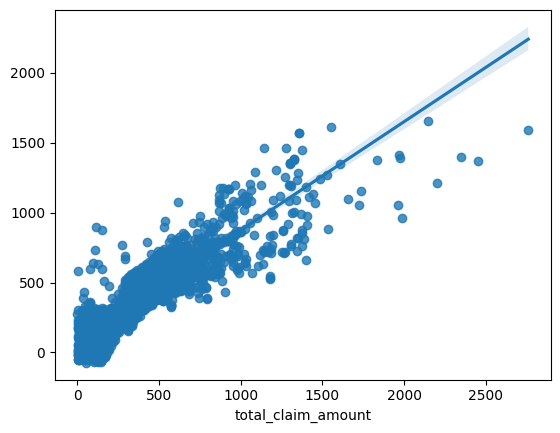

In [14]:
std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

lm = LinearRegression()
lm.fit(x_train_std, y_train)
predictions = lm.predict(x_test_std)

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
sns.regplot(x=y_test, y=predictions)

### Metrics using minmax scaler

R2_score: 0.76

MSE: 19249.71309638138

RMSE: 138.7433353223908

MAE: 94.63025533090114

In [15]:
mm_scaler.fit(x_train)
x_train_mm = mm_scaler.transform(x_train)
x_test_mm = mm_scaler.transform(x_test)

lm = LinearRegression()
lm.fit(x_train_mm, y_train)
predictions = lm.predict(x_test_mm)

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.76
MSE: 19243.073236429536
RMSE: 138.71940468596864
MAE: 94.35911578329078


### Metrics using normalizer scaler

R2_score: 0.48

MSE: 42530.759519251274

RMSE: 206.22987057953384

MAE: 145.36195346256565



In [16]:
norm_scaler.fit(x_train)
x_train_norm = norm_scaler.transform(x_train)
x_test_norm = norm_scaler.transform(x_test)

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
predictions = lm.predict(x_test_norm)

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.48
MSE: 42530.75951925129
RMSE: 206.22987057953387
MAE: 145.36195346256585


### Using standard scaler on X: Applying log scaling to target to improve R2 score
original R2_score: 0.76

new R2_score: 0.73


In [17]:
y_train_log = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_log = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

lm = LinearRegression()
lm.fit(x_train_std, y_train_log)
predictions = lm.predict(x_test_std)

print("R2_score:", round(r2_score(y_test_log, predictions), 2))

R2_score: 0.72


### Outliers removed

In [18]:
Q3 = np.quantile(df1["total_claim_amount"], 0.75)
Q1 = np.quantile(df1["total_claim_amount"], 0.25)
IQR = Q3 - Q1
upper_range = Q3 + 1.5 * IQR

df1_no = df1[df1["total_claim_amount"] < upper_range]